# Queueing Simulation

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# R packages via python
# Documentation - https://rpy2.github.io/doc/latest/html/index.html
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects import FloatVector


In [3]:
# Documentation - https://github.com/AnthonyEbert/queuecomputer
pandas2ri.activate()
importr('queuecomputer')

rpy2.robjects.packages.Package as a <module 'queuecomputer'>

In [4]:
# Constants
lamdba = 1             # average number of arrivals per time period
walkin_mean = 2        # average time interval between walk-ins in minutes
walkin_sd = 0.5        # standard deviation of walk-ins in minutes
service_time_mean = 3  # time in minutes to complete service and allow next object in queue
service_time_sd = 0.5  # standard deviation of service time
number_of_people = 25  # simulation size

In [5]:
# calc arrival time and service time interval
cumulative_time = np.random.normal(loc=walkin_mean, scale=walkin_sd, size=number_of_people).cumsum()
cumulative_time = np.insert(cumulative_time, 0,0)
service_time = np.random.normal(loc=service_time_mean, scale=service_time_sd, size=number_of_people)
service_time = np.insert(service_time, 0,0)

In [6]:
arrival = FloatVector(cumulative_time)
service = FloatVector(service_time)

In [7]:
## Outputs of simulation (see below) 
##  $ departures     : num array of size n
##  $ server         : int array of size n
##  $ departures_df  : tibble [n x 6] (S3: tbl_df/tbl/data.frame)
##  $ queuelength_df :'data.frame': n obs. of  2 variables:
##  $ systemlength_df:'data.frame': n obs. of  2 variables:
##  $ servers_input  : num 1
##  $ state          : num 101
##  - attr(*, "class")= chr [1:2] "queue_list" "list"
simulation = r['queue_step'](arrivals=arrival, service=service,servers=1)

In [8]:
print('Departures: ', simulation[0])
print('Servers: ', simulation[1])
print('Summary Dataframe: ', simulation[2])
# print('Wait List: ', simulation[3])

Departures:  [ 0.          5.70958913  8.18079392 11.06112412 13.91817469 17.23054904
 20.3878493  22.71807722 25.3888609  28.69164257 32.47185062 35.97113642
 38.83858443 42.50197736 45.42716542 48.14712569 50.75313492 53.31547555
 56.0981613  59.39835013 62.94987606 65.46701134 68.50647574 71.5284377
 75.19120481 78.81108884]
Servers:   [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Summary Dataframe:  # A tibble: 26 x 6
   arrivals service departures waiting system_time server
      <dbl>   <dbl>      <dbl>   <dbl>       <dbl>  <int>
 1     0       0          0       0           0         1
 2     2.22    3.49       5.71    0           3.49      1
 3     4.04    2.47       8.18    1.67        4.14      1
 4     6.55    2.88      11.1     1.64        4.52      1
 5     9.70    2.86      13.9     1.36        4.22      1
 6    11.2     3.31      17.2     2.68        6.00      1
 7    13.6     3.16      20.4     3.61        6.77      1
 8    15.4     2.33      22.7     4.95   

Average Wait Time:  12.849147485843742  min
Maximum Queue Size:  10


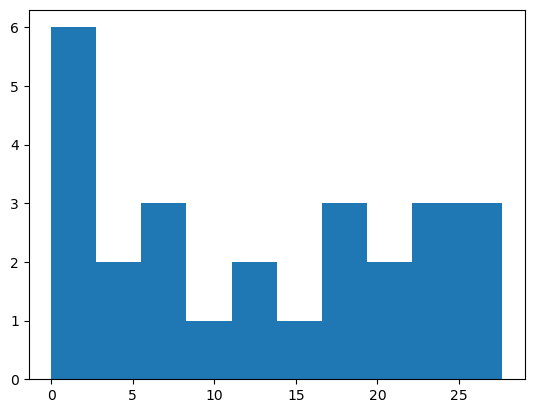

In [9]:
df_events = simulation[2]
print('Average Wait Time: ', df_events.rx2('waiting').mean(), ' min')

df_queue = simulation[3]
print('Maximum Queue Size: ', max(df_queue.rx2('queuelength')))

plt.hist(df_events.rx2('waiting'));